<a href="https://colab.research.google.com/github/PabloVKF/python_scikit_learn/blob/main/Python_Scikit_Learn_regress%C3%A3o%2C_classifica%C3%A7%C3%A3o_e_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
passageiros = pd.read_csv('Passageiros.csv')

In [3]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
import seaborn as sns

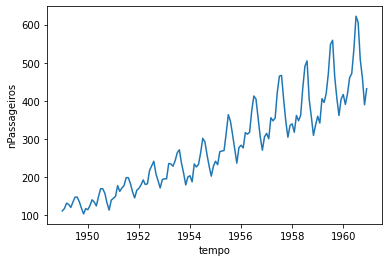

In [5]:
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [6]:
tempo = passageiros.iloc[:,:-1].values

In [7]:
nPassageiros = passageiros.iloc[:,1].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
tempo_treino, tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(tempo, nPassageiros, test_size = 0.3)

In [10]:
from sklearn import  linear_model

In [11]:
regressor = linear_model.LinearRegression()

In [12]:
regressor.fit(tempo_treino, nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
nPassageiros_predito = regressor.predict(tempo_teste)

In [14]:
import numpy as np

In [15]:
passageiros_predito = pd.DataFrame({'tempo': np.ndarray.flatten(tempo_teste), 'nPassageiros': nPassageiros_predito})

In [16]:
passageiros_teste = pd.DataFrame({'tempo': np.ndarray.flatten(tempo_teste), 'nPassageiros': nPassageiros_teste})

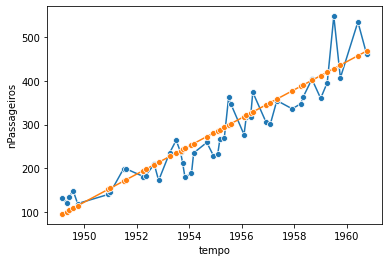

In [17]:
sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_teste, marker='o')
sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_predito, marker='o')

In [18]:
regressor.coef_

array([32.20067609])

In [19]:
regressor.intercept_

-62669.093757514376

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8622758923650735

In [22]:
from sklearn.svm import SVR

In [23]:
regressor_svr = SVR(C=10000)

In [24]:
regressor_svr.fit(tempo_treino, nPassageiros_treino)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
nPassageiros_predito_svr = regressor_svr.predict(tempo_teste)

In [26]:
passageiros_predito_svr = pd.DataFrame({'tempo': np.ndarray.flatten(tempo_teste), 'nPassageiros': nPassageiros_predito_svr})

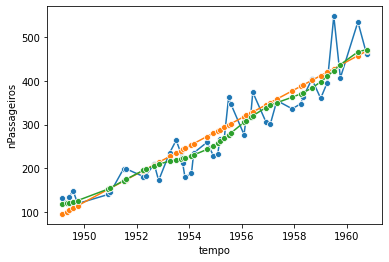

In [27]:
sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_teste, marker='o')
sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_predito, marker='o')
sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_predito_svr, marker='o')

In [28]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.8883280092883414

In [29]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8622758923650735

In [30]:
celular = pd.read_csv("Celular.csv", delimiter=",")

In [31]:
celular.head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


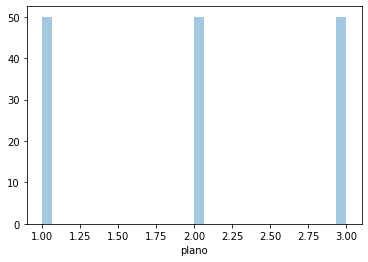

In [32]:
sns.distplot(celular["plano"], bins=30, kde=False)

In [33]:
x = celular.iloc[:, :-1].values

In [34]:
y = celular.iloc[:,4].values

In [35]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [36]:
from sklearn import tree

In [37]:
classificador_arvore = tree.DecisionTreeClassifier()

In [38]:
classificador_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
import graphviz

In [40]:
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None)

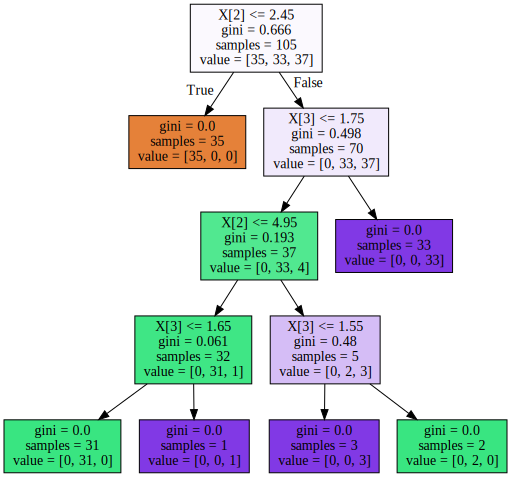

In [41]:
graphviz.Source(dot_data)

In [42]:
plano_previsto = classificador_arvore.predict(x_teste)

In [43]:
plano_previsto

array([2, 1, 3, 1, 1, 2, 3, 2, 2, 1, 3, 1, 3, 3, 2, 1, 2, 1, 2, 1, 3, 1,
       1, 2, 3, 1, 2, 2, 2, 2, 3, 1, 3, 1, 3, 1, 2, 2, 3, 2, 3, 2, 1, 3,
       2])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


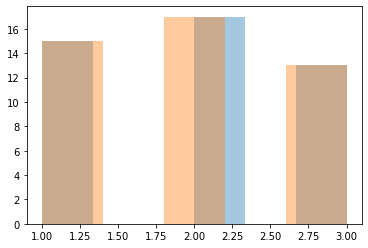

In [44]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto, bins=5, kde=False)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_teste, plano_previsto)*100

95.55555555555556

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
classificador_vizinho = KNeighborsClassifier(5)

In [49]:
classificador_vizinho.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
plano_previsto_v = classificador_vizinho.predict(x_teste)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


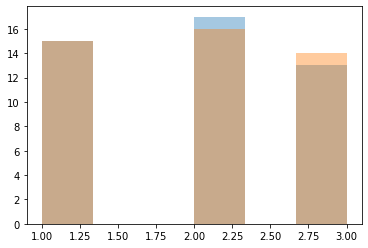

In [51]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto_v, bins=6, kde=False)

In [52]:
accuracy_score(y_teste, plano_previsto_v)*100

97.77777777777777

In [53]:
plano_previsto_v2 = classificador_vizinho.predict(x_treino)

In [54]:
accuracy_score(y_treino, plano_previsto_v2)*100

96.19047619047619

In [55]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [56]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
params = {"n_neighbors": [5]}

In [59]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=skfold, verbose=1, scoring="accuracy", return_train_score=True)

In [60]:
gs.fit(x, y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [61]:
gs.cv_results_['mean_test_score']

array([0.964])

In [62]:
engajamento = pd.read_csv("Engajamento.csv")

In [63]:
engajamento.head()

,Horas,Taxa de Cliques,Classe
0,1007.084589,1.582099,1
1,1005.886193,1.524809,1
2,1005.609471,0.846857,1
3,989.814354,2.841944,2
4,995.328807,3.569900,3


In [64]:
x = engajamento.iloc[:,:-1]

In [65]:
x

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900
...,...,...
4995,991.447007,5.428443
4996,996.841049,15.504041
4997,991.723479,4.750185
4998,996.695706,14.807956


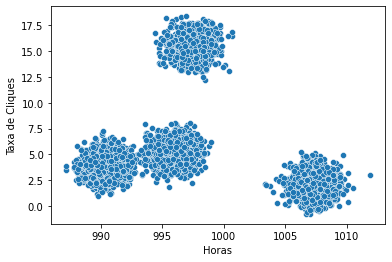

In [66]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=x)

In [67]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [69]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [70]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

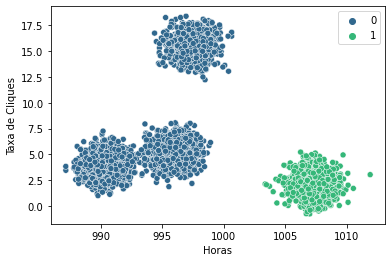

In [71]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=x, hue=kmeans.labels_,
                palette='viridis')

In [72]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [73]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

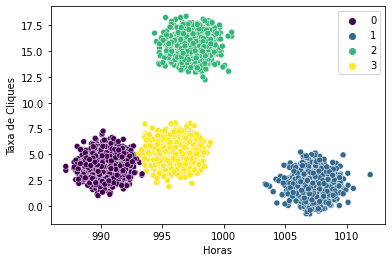

In [74]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=x, hue=kmeans.labels_,
                palette='viridis')

In [75]:
from sklearn.cluster import OPTICS

In [76]:
clustering_o = OPTICS(min_samples=800).fit(x)

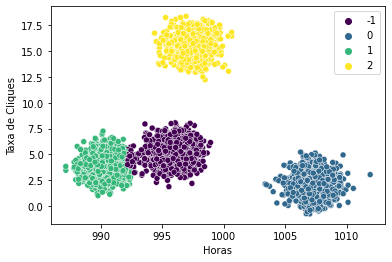

In [77]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=x, hue=clustering_o.labels_, palette='viridis')

In [78]:
from sklearn import metrics

In [79]:
Classe_conhecida =engajamento['Classe']

In [80]:
Classe_estimada = clustering_o.labels_

In [81]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimada)

0.9821047486293407

In [82]:
Classe_estimada = kmeans.labels_

In [83]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimada)

0.9957444328155858

In [84]:
metrics.silhouette_score(x, kmeans.labels_, metric='euclidean')

0.7640009351490763

In [85]:
metrics.silhouette_score(x, clustering_o.labels_, metric='euclidean')

0.7590075270703337